In [1]:
import matplotlib.pyplot as plt
from fredapi import Fred
fred = Fred(api_key='a275ad4727fcefbe49e6d8aef78a1268')
consumption = fred.get_series('PCECC96')
stockreturn = fred.get_series('WILL5000INDFC')
deflator = fred.get_series("GDPDEF")
riskfree = fred.get_series("TB3MS")
import pandas as pd
from pandas import DataFrame
from pandas import Series
from datetime import datetime
from functools import reduce

#consumption is quarterly data
#stock return is work-daily data
#GDP deflator is quarterly data
#riskfree is monthly data
consumption = pd.DataFrame(consumption)
stockreturn = pd.DataFrame(stockreturn)
deflator = pd.DataFrame(deflator)
riskfree = pd.DataFrame(riskfree)
consumption.columns=['consumption']
stockreturn.columns=['stockprice']
deflator.columns=['deflator']
riskfree.columns=['riskfree']


consumption = consumption.dropna()
stockreturn = stockreturn.dropna()
deflator = deflator.dropna()
riskfree = riskfree.dropna()

# print(len(consumption))
# print(len(stockreturn))
# print(len(deflator))
# print(len(riskfree))
dfs = [consumption, stockreturn, deflator,riskfree]
df_final = reduce(lambda left,right: left.join(right,how='inner'), dfs)
df_final["stockprice"] = df_final["stockprice"]/df_final["deflator"]
df_final["stockprice"] = df_final["stockprice"]*43.800
df_final["riskfree"] = df_final["riskfree"]/100
df_final


,consumption,stockprice,deflator,riskfree
1980-04-01,4181.510,1.887389,41.772,0.1320
1980-07-01,4227.379,2.123077,42.705,0.0806
1980-10-01,4284.494,2.359031,43.818,0.1162
1981-04-01,4299.160,2.473497,45.863,0.1369
1981-07-01,4319.047,2.390318,46.726,0.1495
1981-10-01,4289.504,2.100896,47.534,0.1354
1982-04-01,4334.262,2.018888,48.814,0.1270
1982-07-01,4363.318,1.928736,49.506,0.1135
1982-10-01,4439.749,2.162898,50.019,0.0771
1983-07-01,4656.982,3.132779,51.311,0.0908


Text(0.5,1,'Consumption over time')

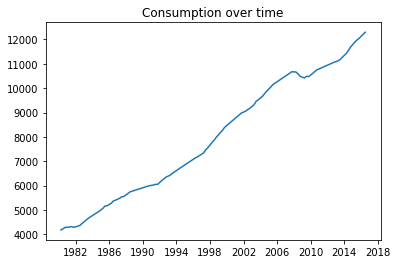

In [2]:
plt.plot(df_final['consumption'])
plt.title("Consumption over time")

Text(0.5,1,'Stock market index, adjusted for inflation')

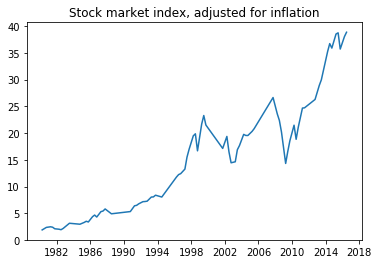

In [3]:
plt.plot(df_final['stockprice'])
plt.title("Stock market index, adjusted for inflation")

Text(0.5,1,'3-M T Bill Rate')

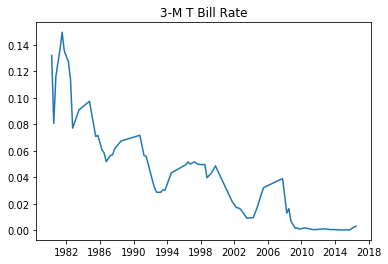

In [4]:
plt.plot(df_final["riskfree"])
plt.title("3-M T Bill Rate")

# Exercise 1

In [5]:
import numpy as np
import scipy.optimize as opt
import scipy.linalg as la


# we choose the stock index as an asset
stock_price = np.array(df_final['stockprice'])
stock_return = stock_price[1:]/stock_price[:-1]
# stock_return is the R vector

#next we need SDF

def get_SDF(gamma):
    beta = 0.99
    consump = np.array(df_final["consumption"])
    marg_ratio = consump[1:]/consump[:-1]
    SDF = beta * (marg_ratio ** -gamma)
    return SDF


def equations_1(gamma):
    SDF = get_SDF(gamma)
    m_bar = SDF.mean()
    R_bar = stock_return.mean()
    
    #calculate sample cov
    sample_cov = ((SDF - m_bar) * (stock_return - R_bar)).sum()/(len(SDF)-1)
    
    res = SDF * stock_return + sample_cov - 1
    return la.norm(res)


soln = opt.minimize(equations_1, 3.53)

soln
# we use a minimizer to find the gamma that makes equations_1 as small as possible



      fun: 0.9684712224909707
 hess_inv: array([[33.36789811]])
      jac: array([8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([3.52305428])

In [6]:
gamma1 = soln.x
sdf1 = get_SDF(gamma1)
m_bar = sdf1.mean()
R_bar = stock_return.mean()
    
    #calculate sample cov
sample_cov1 = ((sdf1 - m_bar) * (stock_return - R_bar)).sum()/(len(sdf1)-1)
    
res1 = sdf1 * stock_return + sample_cov1 - 1
res1

array([ 6.95897229e-02,  4.71809071e-02,  2.35695277e-02, -6.07675226e-02,
       -1.10618952e-01, -8.48532650e-02, -7.82568425e-02,  4.22633960e-02,
        2.09776600e-01, -2.41859065e-01,  2.50343545e-03, -1.33768291e-02,
       -5.62452879e-02,  1.92763107e-01, -6.42388183e-03, -1.09780301e-01,
        1.58992817e-01, -3.05488987e-02,  5.13308564e-02, -2.59957661e-01,
       -7.66179675e-02,  1.70047020e-01, -1.66252414e-02,  3.32346469e-02,
       -4.23883018e-02, -4.45457644e-02, -4.45501535e-02,  4.44922394e-02,
       -4.65254245e-02, -3.73760056e-03, -1.38026290e-01,  1.82028126e-01,
        3.78307990e-03, -2.47993915e-02,  1.01223948e-03,  8.78521938e-02,
        3.78869770e-02,  2.95244463e-02, -3.79994469e-02, -2.11623312e-01,
        1.79837965e-01,  2.00102311e-02, -1.33286672e-01, -3.81036991e-01,
        8.56438183e-02, -1.80850494e-01, -1.51931201e-01, -5.34800597e-02,
        8.34915481e-02,  9.00628580e-03,  4.79534158e-02, -5.93273848e-02,
       -4.93879539e-02, -

$\gamma = 3.523 $ numerically makes equation (5) hold.

# Exercise 3
Next we use $$1 + r_f = \frac{1}{\mathbb{E}[m_{t+1}|\Omega_t]}$$ to estimate $\gamma$.

In [7]:
def equations_2(gamma):
    sdf2 = get_SDF(gamma)
    rf_return = np.array(df_final["riskfree"])
    
    res = 1 / sdf2 - 1 - rf_return[1:]
    return la.norm(res)

soln2 = opt.minimize(equations_2, 4)
soln2

      fun: 0.3553433012173679
 hess_inv: array([[10.23531438]])
      jac: array([-2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([1.20639256])

This time the estimate is 1.206

# Exercise 4

In [20]:
consump = np.array(df_final["consumption"])
marg_ratio = consump[1:]/consump[:-1]
rf_return = np.array(df_final["riskfree"])


def equations_3(param_vec):
    beta, gamma = param_vec
    
    
    
    SDF = beta * (marg_ratio ** -gamma) # sdf uses both gamma and beta
    
    m_bar = SDF.mean()
    R_bar = stock_return.mean()
    #calculate sample cov
    sample_cov = ((SDF - m_bar) * (stock_return - R_bar)).sum()/(len(SDF)-1)
    res1 = SDF * stock_return + sample_cov - 1 # the first moment using both gamma and beta
    res1 = la.norm(res1)

    res2 = 1 / SDF - 1 - rf_return[1:] # the second moment using both gamma and beta
    res2 = la.norm(res2)
    return la.norm(np.array([res1, res2]))


print(equations_3([0.99,1.206]))

init_guess  = [0.96, 2]
soln3 = opt.minimize(equations_3, init_guess)
soln3
    

    

1.1112403046703228


      fun: 1.0697837412548357
 hess_inv: array([[1.22335343e-02, 4.20925943e-01],
       [4.20925943e-01, 2.89350318e+01]])
      jac: array([-4.32133675e-07,  1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 10
     njev: 13
   status: 0
  success: True
        x: array([0.97986216, 1.91166552])

In [21]:
print("The estimated beta is 0.97, esitmated gamma is 1.91")

The estimated beta is 0.97, esitmated gamma is 1.91


# Part 2
I borrow ideas from Zunda Xu

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pprint as pprint
import scipy.stats as sts
files = ['AAPL', 'C', 'GBX', 'SPY', 'THO']
file_objs = []
for file in files:
    with open(file, 'rb') as pickle_file:
        file_objs.append(pickle.load(pickle_file))
        

In [26]:
class OrderBook:
    """
    This class is defined to represent a single orderbook. 
    
    Attributes:
        data : raw data
        time : time (in seconds since midnight) of observations
        P : vector of prices
        Q : vector of quantities
        midpoint : actual midpoint of the BBO
        gamma : intercept of linear regression
        beta : slope of linear regression
        price : market clearing price
        ratio : noise signal ratio     
    """
    
    def __init__(self, data, window):
        
        self.data = data[1]
        self.timestamp = data[0]
        self.lower = window[0]
        self.upper = window[1]
        df = pd.DataFrame.from_dict(self.data, orient='index')
    
        df.columns = ['Quantity', 'Type', 'NaN0','NaN1']
        df = df[['Quantity', 'Type']]
        
        self.demand = df[df['Type'] == 'B'].sort_index(ascending=False)
        self.supply = df[df['Type'] == 'S'].sort_index()
        self.demand['QD'] = -self.demand['Quantity'].cumsum()
        self.supply['QS'] = self.supply['Quantity'].cumsum()
        
        orders = pd.concat([self.demand, self.supply])
        orders = orders.fillna(0)
        orders['Q'] = orders['QD'] + orders['QS']
        self.midpoint = orders[orders.Q < 0].index.values[0]
        
        self.orders = orders[(orders.index > window[0] * self.midpoint) 
                             & (orders.index < window[1]* self.midpoint)]
        
        self.Q = self.orders['Q']
        self.P = self.orders.index.values
                
    def est(self):
        slope, intercept, r_value, p_value, std_err = sts.linregress(self.P, self.Q)
        self.gamma = intercept
        self.beta = slope
        self.price = - self.gamma/self.beta
        self.ratio = self.beta    

    def plot(self, name):
        fig = plt.figure(figsize=(10,7))
        plt.plot(self.demand.index.values, self.demand['QD'], label='demand')
        plt.plot(self.supply.index.values, self.supply['QS'], label='supply')
        p_grid = np.linspace(self.lower * self.midpoint, self.upper * self.midpoint)
        plt.plot(p_grid, self.gamma + self.beta * p_grid, 'k', label='Estimated Equation')
        plt.xlim(0.5 * self.midpoint, 1.5 * self.midpoint)
        plt.xlabel('Price')
        plt.ylabel('Quantity')
        plt.title(name + ' Stock at t = %i' %self.timestamp)
        plt.legend()
        plt.show()
        
    def compare(self):
        print("The estimated market clearing price is: %f" %self.price)
        print("The actual midpoint of the BBO is: %f" %self.midpoint)

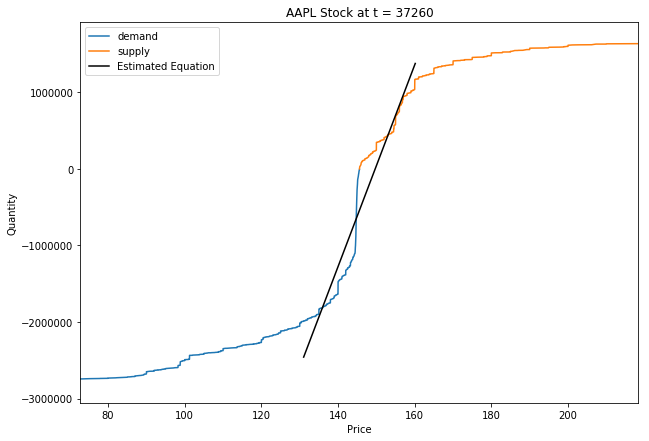

The estimated market clearing price is: 149.686787
The actual midpoint of the BBO is: 145.580000


In [27]:
def show(file, t, name):
    test = OrderBook(file[t], (0.9, 1.1))
    test.est()
    test.plot(name)
    test.compare()
    
show(file_objs[0], 50, 'AAPL')

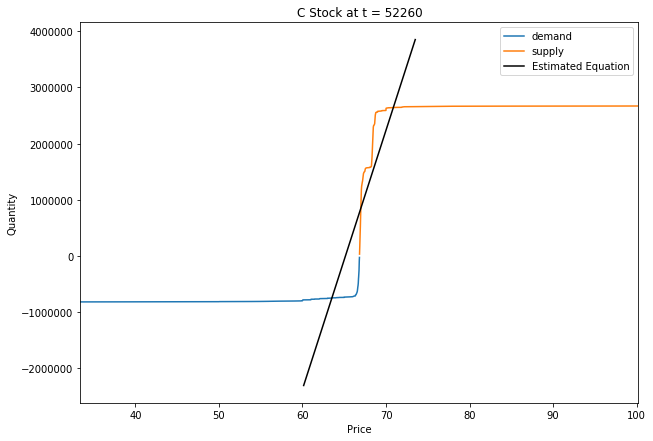

The estimated market clearing price is: 65.141571
The actual midpoint of the BBO is: 66.820000


In [28]:
show(file_objs[1], 300, 'C')

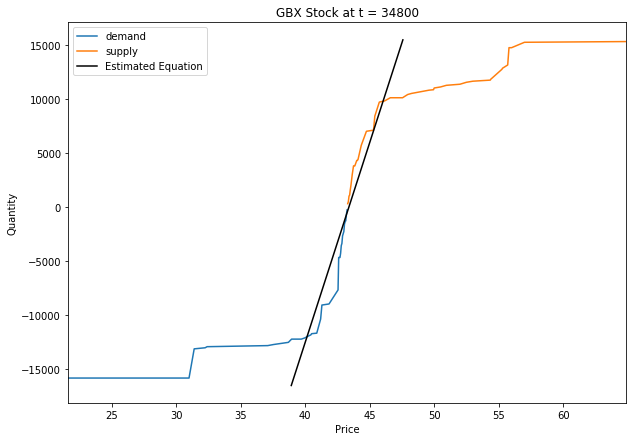

The estimated market clearing price is: 43.393255
The actual midpoint of the BBO is: 43.250000


In [29]:
show(file_objs[2], 9, 'GBX')

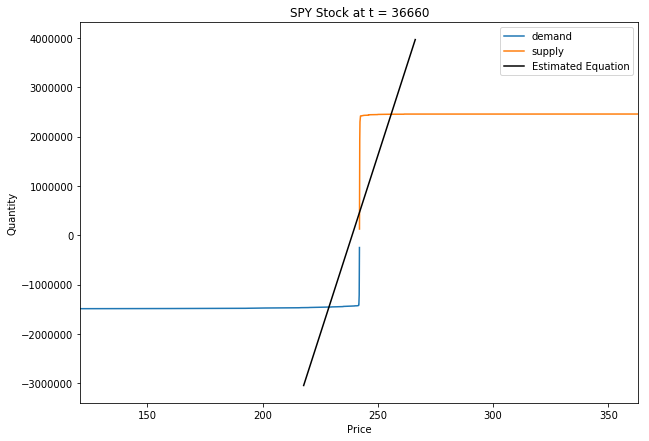

The estimated market clearing price is: 238.868532
The actual midpoint of the BBO is: 242.040000


In [30]:
show(file_objs[3], 40, 'SPY')

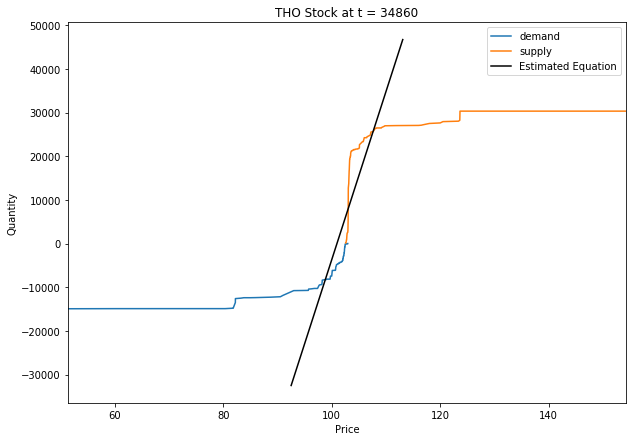

The estimated market clearing price is: 100.966398
The actual midpoint of the BBO is: 102.810000


In [31]:
show(file_objs[4], 10, 'THO')

In [38]:
def plot_ratio(file_obj, title):
    ratio = np.zeros(len(file_obj), dtype=np.float64)
    for i in range(len(file_obj)):
        book = OrderBook(file_obj[i], (0.9, 1.1))
        book.est()
        ratio[i] = book.ratio
    
    fig = plt.figure(figsize=(10,7))
    plt.plot(ratio)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(r'$\frac{2\sigma_{u}}{\sqrt{\Sigma_{0}}}$')
    plt.show()

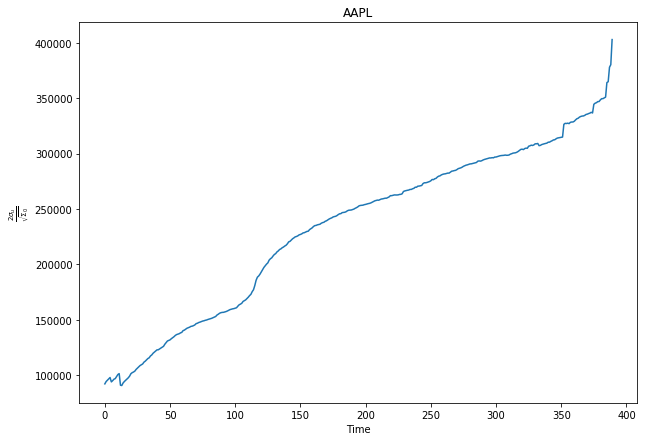

In [39]:
plot_ratio(file_objs[0], 'AAPL')

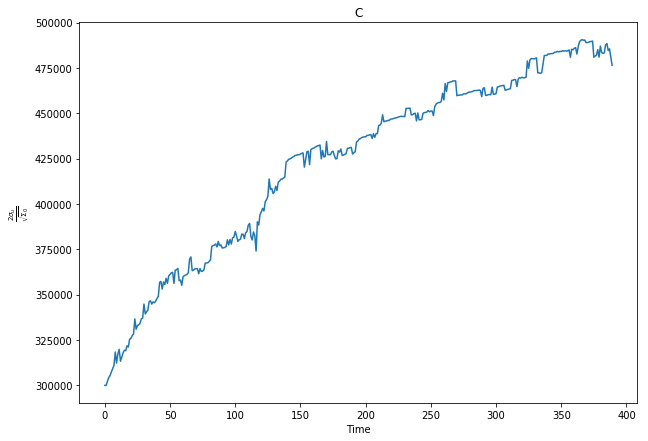

In [40]:
plot_ratio(file_objs[1], 'C')

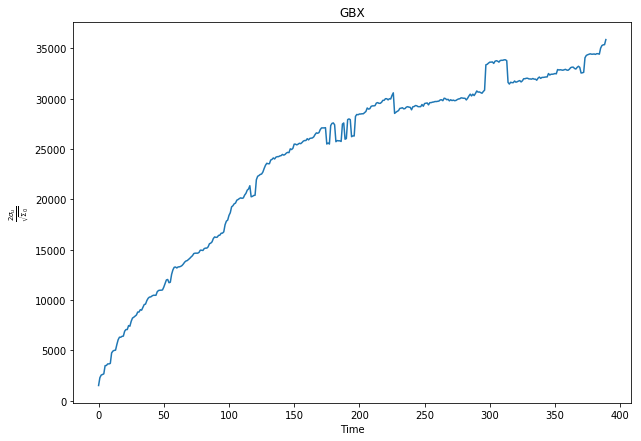

In [41]:
plot_ratio(file_objs[2], 'GBX')

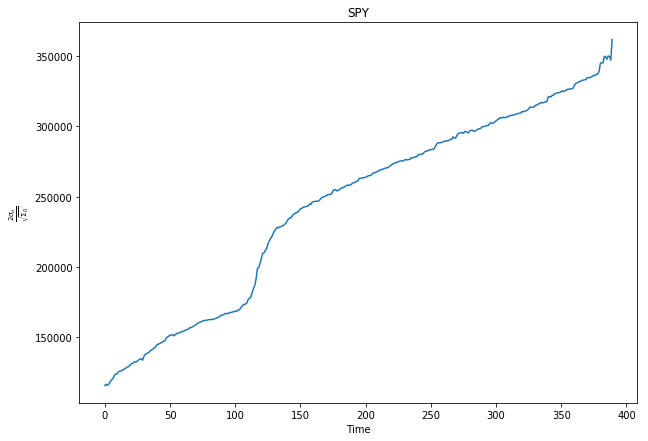

In [42]:
plot_ratio(file_objs[3], 'SPY')

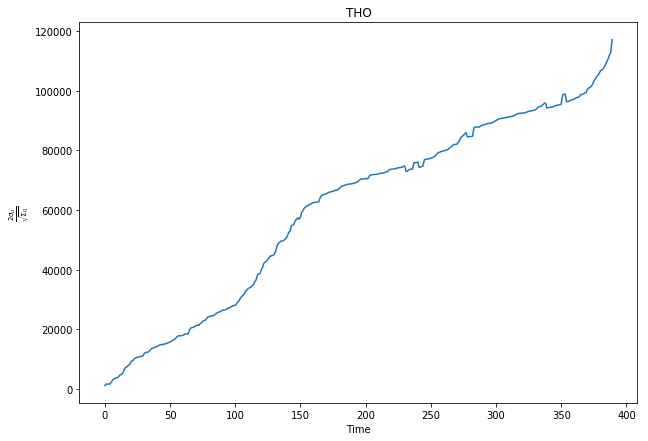

In [43]:
plot_ratio(file_objs[4], 'THO')